# Logistic Regression

## Importing the libraries

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [66]:
dataset = pd.read_csv('/content/car_purchase_data.csv')
x = dataset.iloc[:, :-1].values  # Feature matrix (all columns except last)
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Feature Scaling

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)  # Fit and transform training data
x_test = sc.transform(x_test)

In [69]:
print(x_train)
print(x_test)

[[ 1.92e+00  2.15e+00]
 [ 2.02e+00  3.79e-01]
 [-1.38e+00 -4.32e-01]
 [-1.19e+00 -1.01e+00]
 [ 1.92e+00 -9.25e-01]
 [ 3.68e-01  2.92e-01]
 [ 1.73e-01  1.47e-01]
 [ 2.02e+00  1.74e+00]
 [ 7.56e-01 -8.38e-01]
 [ 2.70e-01 -2.88e-01]
 [ 3.68e-01 -1.72e-01]
 [-1.18e-01  2.20e+00]
 [-1.48e+00 -6.35e-01]
 [-1.29e+00 -1.07e+00]
 [-1.38e+00  4.08e-01]
 [-1.09e+00  7.55e-01]
 [-1.48e+00 -2.01e-01]
 [ 9.51e-01 -1.07e+00]
 [ 9.51e-01  5.82e-01]
 [ 3.68e-01  9.87e-01]
 [ 5.62e-01 -8.96e-01]
 [-6.05e-01  1.45e+00]
 [-2.13e-02 -5.77e-01]
 [-6.05e-01  1.89e+00]
 [ 1.34e+00 -1.42e+00]
 [ 1.44e+00  9.87e-01]
 [ 7.59e-02 -8.09e-01]
 [-2.13e-02 -2.59e-01]
 [-2.16e-01 -5.77e-01]
 [-2.16e-01 -2.01e-01]
 [-3.13e-01 -1.30e+00]
 [-3.13e-01 -5.77e-01]
 [ 3.68e-01  8.90e-02]
 [ 8.54e-01 -6.06e-01]
 [ 2.02e+00 -1.19e+00]
 [ 1.05e+00 -1.43e-01]
 [ 6.59e-01  1.77e+00]
 [-7.02e-01  5.53e-01]
 [ 7.56e-01  3.50e-01]
 [ 8.54e-01 -5.48e-01]
 [-1.19e+00 -1.59e+00]
 [ 2.12e+00  9.29e-01]
 [-2.13e-02  1.22e+00]
 [ 1.73e-01

## Training the Logistic Regression model on the Training set

In [70]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

## Predicting a new result

In [71]:
print(classifier.predict(sc.transform([[22, 40000]])))

[0]


## Predicting the Test set results

In [72]:
y_pred = classifier.predict(x_test)

In [78]:

print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis=1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]]


## Making the Confusion Matrix

In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[57  1]
 [ 5 17]]


In [81]:
accuracy_score(y_test, y_pred)

0.925

## Visualising the Training set results

<ipython-input-82-f69cd9b9eb68>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


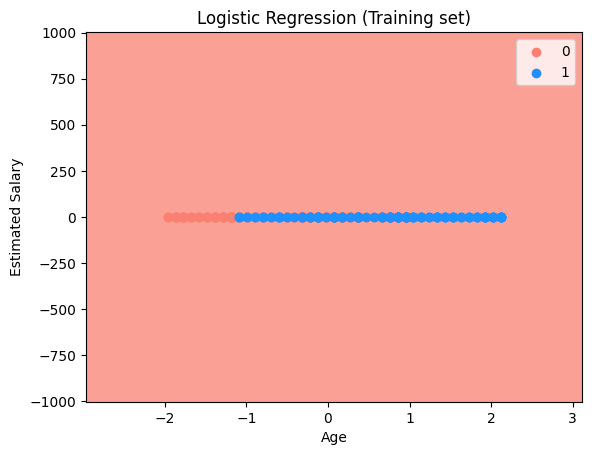

In [82]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1000, stop=x_set[:, 1].max() + 1000, step=0.01))
plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

<ipython-input-83-dd46ad24b9ee>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


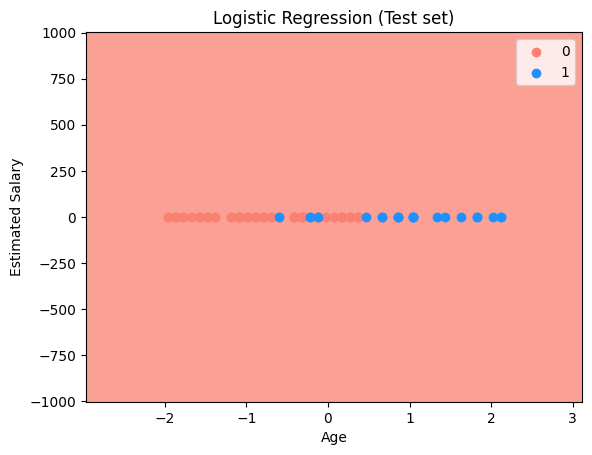

In [83]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1000, stop=x_set[:, 1].max() + 1000, step=0.01))
plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()